In [17]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Rrod_tolerance_4rod.csv','r')
rdr = csv.reader(file)
rod39 = [[],[],[],[],[]]
rod40 = [[],[],[],[],[]]
rod41 = [[],[],[],[],[]]

for line in rdr:
    if (int(line[1]) == 20):
        rod41[0].append(float(line[2]))
        rod41[1].append(float(line[4]))
        rod41[2].append(float(line[-2]))
        rod41[3].append(float(line[-1]))
        rod41[4].append(float(line[0]))
    elif (int(line[1]) == 18):
        rod39[0].append(float(line[2]))
        rod39[1].append(float(line[4]))
        rod39[2].append(float(line[-2]))
        rod39[3].append(float(line[-1]))        
        rod39[4].append(float(line[0]))
    elif (int(line[1]) == 19):
        rod40[0].append(float(line[2]))
        rod40[1].append(float(line[4]))
        rod40[2].append(float(line[-2]))
        rod40[3].append(float(line[-1]))
        rod40[4].append(float(line[0]))
file.close()

for i in range(0,4):
    rod39[i].reverse()
    rod40[i].reverse()
    rod41[i].reverse()
Rod39 = np.array(rod39)
Rod40 = np.array(rod40)
Rod41 = np.array(rod41)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0021145371283238443, 0.0021145370689238446, 0.00308128364251665, 0.014146164979483797, 0.02369084587117291, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0021145370035238445, 0.0021145369946238444, 0.0029882398337483583, 0.014088207020285619, 0.023757746633562074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001978267251787368, 0.001978267247124368, 0.002802768385240163, 0.014030305343107195, 0.023757746547222073, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018424548668736413, 0.0018424548681714413, 0.002480163644217198, 0.013914669871578118, 0.023824707799533752, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015721996670531614, 0.0015721996593631613

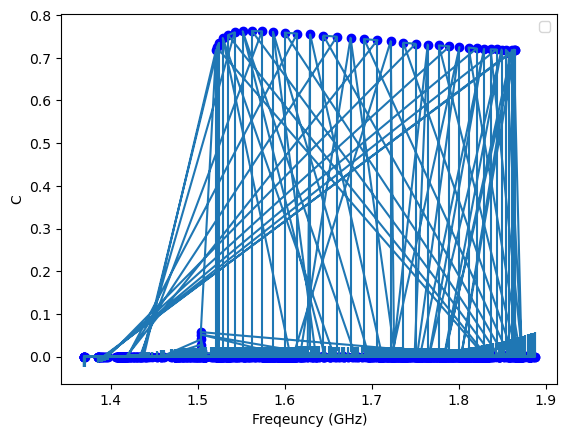

In [18]:
def func_3(x,a,b,c,d):
    return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def func_2(x,a,b,c):
    return a*np.power(x,2)+b*np.power(x,1)+c

x_39, x_40, x_41 = Rod39[0], Rod40[0], Rod41[0]
y1_39, y1_40, y1_41 = Rod39[1], Rod40[1], Rod41[1]

freq_range = np.linspace(1.18,1.50,320)
#plt.plot(x_39,y1_39,'ro')
plt.plot(x_40,y1_40,'bo')
#plt.plot(x_41,y1_41,'go')
popt_39, pcov_39 = curve_fit(func_3,x_39,y1_39)
#plt.plot(freq_range,func_3(freq_range,*popt_39),'r-', label = 'Rrod = 39 mm')
popt_40, pcov_40 = curve_fit(func_3,x_40,y1_40)
#plt.plot(freq_range,func_3(freq_range,*popt_40),'b-', label = 'Rrod = 40 mm')
popt_41, pcov_41 = curve_fit(func_3,x_41,y1_41)
#plt.plot(freq_range,func_3(freq_range,*popt_41),'g-', label = 'Rrod = 41 mm')

y_39error = func_3(x_40,*popt_39)-y1_40
y_41error = func_3(x_40,*popt_41)-y1_40

y_nerror = [0 for i in range(len(x_40))]
y_perror = [0 for i in range(len(x_40))]
for i in range(len(x_40)):
    if y_39error[i] < 0 and y_41error[i] < 0:
        if y_39error[i] < y_41error[i]:
            y_nerror[i] = abs(y_39error[i])
        else:
            y_nerror[i] = abs(y_41error[i])
    elif y_39error[i] >0 and y_41error[i] >0:
        if y_39error[i] < y_41error[i]:
            y_perror[i] = y_41error[i]
        else:
            y_perror[i] = y_39error[i]
    elif y_39error[i]>0 and y_41error[i] <0:
        y_perror[i] = y_39error[i]
        y_nerror[i] = abs(y_41error[i])
    else:
        y_perror[i] = y_41error[i]
        y_nerror[i] = abs(y_39error[i])
yerr = [tuple(y_nerror),tuple(y_perror)]
print(y_nerror)
print(y_perror)
plt.errorbar(x_40,y1_40,yerr=yerr)
plt.xlabel('Freqeuncy (GHz)')
plt.ylabel('C')
plt.legend()
plt.show()

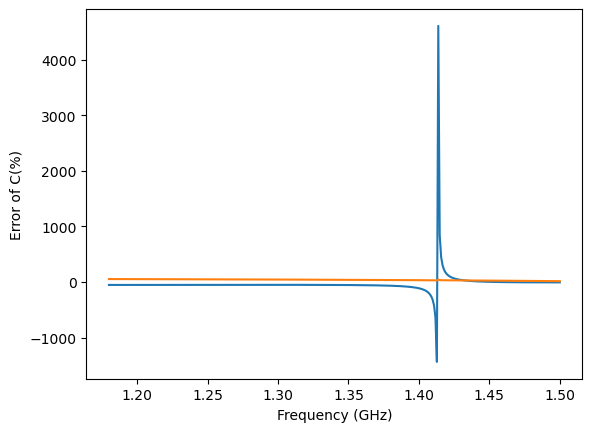

In [19]:
popt_39and40 = (popt_39-popt_40)
popt_41and40 = (popt_41-popt_40)
m = func_3(freq_range,*popt_39and40)/func_3(freq_range,*popt_40)*100
n = func_3(freq_range,*popt_41and40)/func_3(freq_range,*popt_40)*100
plt.plot(freq_range,m)
plt.plot(freq_range,n)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Error of C(%)")
plt.show()

Text(0.5, 1.0, 'Qtot and Qrod v. Frequency')

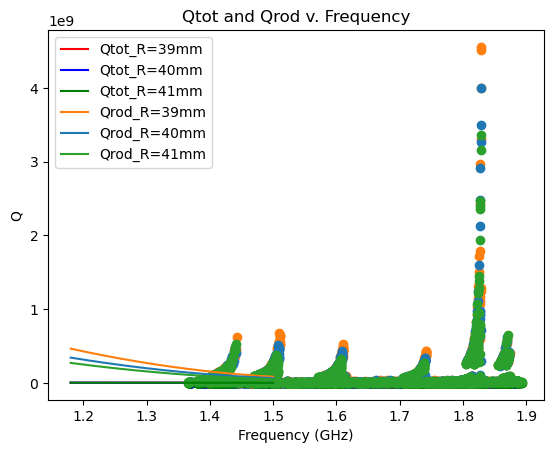

In [20]:
y2_39, y2_40, y2_41 = Rod39[2], Rod40[2], Rod41[2]
y3_39, y3_40, y3_41 = Rod39[3], Rod40[3], Rod41[3]
plt.plot(x_39,y2_39,'ro')
plt.plot(x_39,y3_39,marker='o',color='C1',linestyle = 'none')
Qtot_opt_39, Qtot_cov_39 = curve_fit(func_2,x_39,y2_39)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_39),'r-',label = 'Qtot_R=39mm')
Qrod_opt_39, Qrod_cov_39 = curve_fit(func_2,x_39,y3_39)

plt.plot(x_40,y2_40,'bo')
plt.plot(x_40,y3_40,marker='o',color='C0',linestyle = 'none')
Qtot_opt_40, Qtot_cov_40 = curve_fit(func_2,x_40,y2_40)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_40),'b-', label = 'Qtot_R=40mm')
Qrod_opt_40, Qrod_cov_40 = curve_fit(func_2,x_40,y3_40)


plt.plot(x_41,y2_41,'go')
plt.plot(x_41,y3_41,marker='o',color='C2',linestyle = 'none')
Qtot_opt_41, Qtot_cov_41 = curve_fit(func_2,x_41,y2_41)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_41),'g-', label = 'Qtot_R=41mm')
Qrod_opt_41, Qrod_cov_41 = curve_fit(func_2,x_41,y3_41)


plt.plot(freq_range,func_2(freq_range,*Qrod_opt_39),linestyle = '-', color = 'C1', label = 'Qrod_R=39mm')
plt.plot(freq_range,func_2(freq_range,*Qrod_opt_40),linestyle = '-', color = 'C0', label = 'Qrod_R=40mm')
plt.plot(freq_range,func_2(freq_range,*Qrod_opt_41),linestyle = '-', color = 'C2', label = 'Qrod_R=41mm')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Q')
plt.legend()
plt.title("Qtot and Qrod v. Frequency")

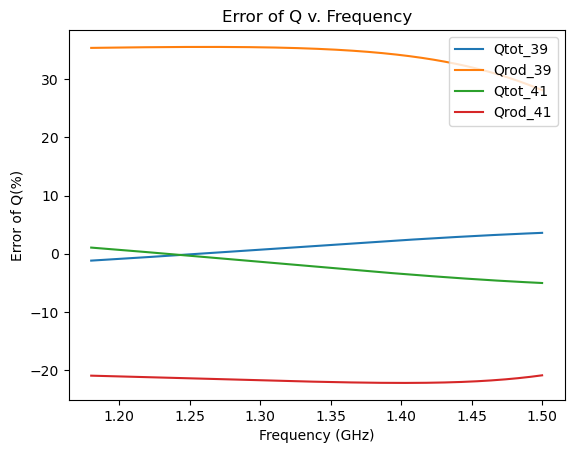

In [21]:
Qtot_opt_39and40 = (Qtot_opt_39-Qtot_opt_40)
Qtot_opt_41and40 = (Qtot_opt_41-Qtot_opt_40)
Qrod_opt_39and40 = (Qrod_opt_39-Qrod_opt_40)
Qrod_opt_41and40 = (Qrod_opt_41-Qrod_opt_40)
p1 = func_2(freq_range,*Qtot_opt_39and40)/func_2(freq_range,*Qtot_opt_40)*100
q1 = func_2(freq_range,*Qtot_opt_41and40)/func_2(freq_range,*Qtot_opt_40)*100
p2 = func_2(freq_range,*Qrod_opt_39and40)/func_2(freq_range,*Qrod_opt_40)*100
q2 = func_2(freq_range,*Qrod_opt_41and40)/func_2(freq_range,*Qrod_opt_40)*100
plt.plot(freq_range,p1,label="Qtot_39")
plt.plot(freq_range,p2,label="Qrod_39")
plt.plot(freq_range,q1,label="Qtot_41")
plt.plot(freq_range,q2,label="Qrod_41")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Error of Q(%)")
plt.legend()
plt.title("Error of Q v. Frequency")
plt.show()

Code blocks below provide Angle v. Eigenfrequency for each value of Variable (which is Rrod for now), and difference of it based on the desired result (Rrod = 40 mm)

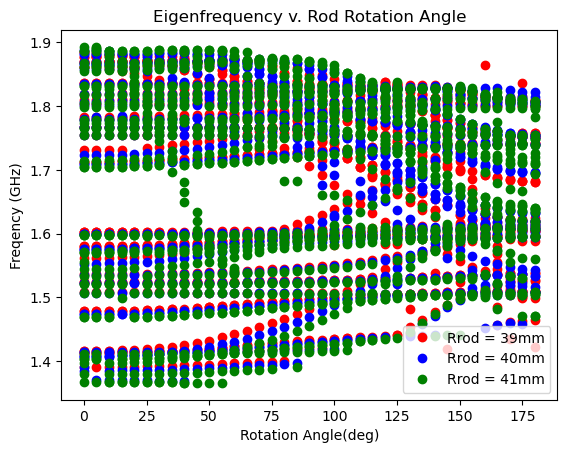

<class 'numpy.float64'>


In [22]:
angle_39, angle_40, angle_41 = Rod39[-1], Rod40[-1], Rod41[-1]
plt.plot(angle_39,x_39,'ro',label="Rrod = 39mm")
plt.plot(angle_40,x_40,'bo',label="Rrod = 40mm")
plt.plot(angle_41,x_41,'go',label="Rrod = 41mm")
plt.xlabel("Rotation Angle(deg)")
plt.ylabel("Freqency (GHz)")
plt.title("Eigenfrequency v. Rod Rotation Angle")
plt.legend()
plt.show()
print(type(angle_39[1]))

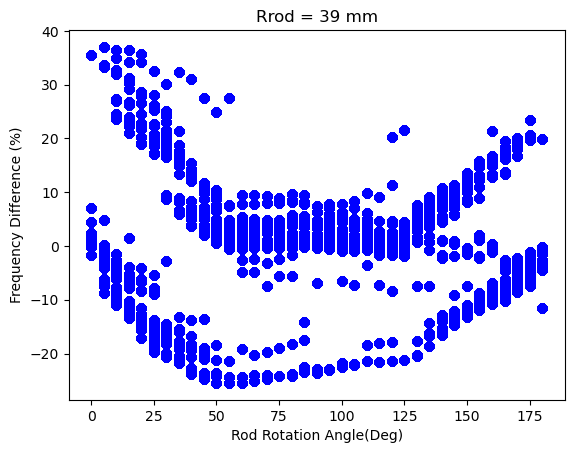

Text(0.5, 1.0, 'Rrod = 41 mm')

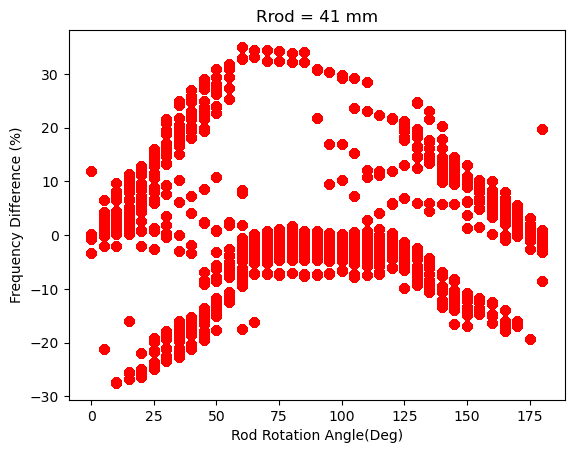

In [23]:
err39 = [[],[]]
for angle40 in Rod40[-1]:
    for angle39 in Rod39[-1]:
        if int(angle40) == int(angle39):
            freq39 = Rod39[0][np.where(Rod39[-1]==angle39)]
            freq40_1= Rod40[0][np.where(Rod40[-1]==angle40)]
            #print(angle40,freq39,freq40_1)

            err = (freq39-freq40_1)/freq40_1*100
            err39[0].append(angle40)
            err39[1].append(err)
plt.plot(err39[0],err39[1],'bo')
plt.xlabel("Rod Rotation Angle(Deg)")
plt.ylabel("Frequency Difference (%)")
plt.title("Rrod = 39 mm")
plt.show()
err41 = [[],[]]
for angle40 in Rod40[-1]:
    for angle41 in Rod41[-1]:
        if int(angle40) == int(angle41):
            freq41 = Rod41[0][np.where(Rod41[-1]==angle41)]
            freq40_2 = Rod40[0][np.where(Rod40[-1]==angle40)]
            #print(angle40,freq41,freq40_2)

            err = (freq41-freq40_2)/freq40_2*100
            err41[0].append(angle40)
            err41[1].append(err)
plt.plot(err41[0],err41[1],'ro')
plt.xlabel("Rod Rotation Angle(Deg)")
plt.ylabel("Frequency Difference (%)")
plt.title("Rrod = 41 mm")